# Problem3 #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
random.seed(0)
np.random.seed(0)

In [2]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
           , 'DiabetesPedigreeFunction', 'Age','Target']

In [3]:
# Read the data
pima = pd.read_csv('Pima.csv',names=columns)

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Data information (columns and rows)
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Data Statistics
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Histogram of Labels')

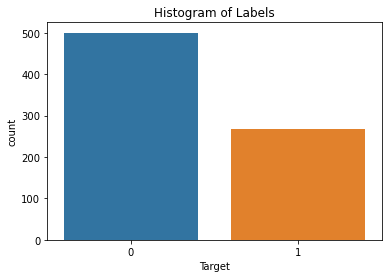

In [7]:
# Histogram of labels
sns.countplot(x='Target',data=pima)
plt.title("Histogram of Labels")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [9]:
X=pima.iloc[:,:8]
y = pima.iloc[:,8:]
accuracy=[]
error=[]

In [10]:
# 2. Splitting the data (training (80%) and test (20%))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# K Value Between 1 and 15
for k in range(1,16):
    print("k = ",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=5, scoring='accuracy') # cv=5 -> no of folds
    print(scores)
    acc = scores.mean()
    print("mean accuracy for k = ",k,"is : ",acc)
    accuracy.append(acc)
    print("*******************")
    error.append(1-acc)

k =  1
[0.6504065  0.68292683 0.69105691 0.67479675 0.63114754]
mean accuracy for k =  1 is :  0.6660669065707051
*******************
k =  2
[0.65853659 0.69918699 0.72357724 0.69918699 0.69672131]
mean accuracy for k =  2 is :  0.6954418232706917
*******************
k =  3
[0.67479675 0.68292683 0.68292683 0.64227642 0.69672131]
mean accuracy for k =  3 is :  0.6759296281487407
*******************
k =  4
[0.67479675 0.70731707 0.65853659 0.69105691 0.72131148]
mean accuracy for k =  4 is :  0.6906037584966013
*******************
k =  5
[0.70731707 0.69918699 0.67479675 0.69105691 0.7704918 ]
mean accuracy for k =  5 is :  0.7085699053711847
*******************
k =  6
[0.69105691 0.73170732 0.7398374  0.69105691 0.7704918 ]
mean accuracy for k =  6 is :  0.7248300679728109
*******************
k =  7
[0.72357724 0.72357724 0.70731707 0.68292683 0.76229508]
mean accuracy for k =  7 is :  0.7199386911901906
*******************
k =  8
[0.69105691 0.72357724 0.74796748 0.70731707 0.72131148

In [12]:
print(accuracy) # accuracy for for K=1 to 16

[0.6660669065707051, 0.6954418232706917, 0.6759296281487407, 0.6906037584966013, 0.7085699053711847, 0.7248300679728109, 0.7199386911901906, 0.7182460349193656, 0.7150073304011728, 0.7199120351859256, 0.7248034119685458, 0.7182593629214982, 0.7150206584033054, 0.7247900839664134, 0.7166600026656005]


In [13]:
# cross validation error for K=1 to 16
print(error)

[0.3339330934292949, 0.3045581767293083, 0.3240703718512593, 0.30939624150339873, 0.2914300946288153, 0.2751699320271891, 0.2800613088098094, 0.28175396508063444, 0.2849926695988272, 0.2800879648140744, 0.2751965880314542, 0.28174063707850183, 0.2849793415966946, 0.2752099160335866, 0.2833399973343995]


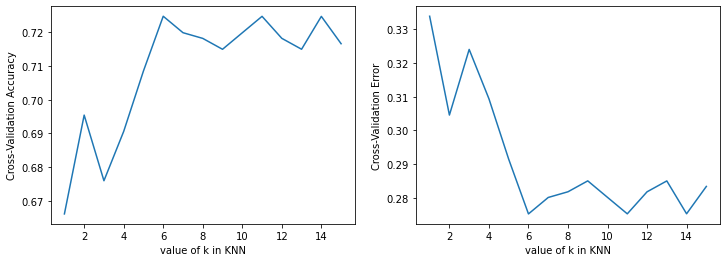

In [15]:
plt.figure(figsize=(12,4))
k_range = range(1,16)
plt.subplot(1,2,1)
plt.plot(k_range,accuracy)
plt.xlabel('value of k in KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(k_range,error)
plt.xlabel('value of k in KNN')
plt.ylabel('Cross-Validation Error')
plt.show()

3. Accuracy max for K=6, for all other K values, accuracy is less. So, I will choose K=6

In [16]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train.values.ravel())
y_pred = knn.predict(X_test)
y_true = y_test.to_numpy().flatten()
total_error=0
total_accuracy=0
for j in range(len(y_pred)):
    if y_pred[j]!=y_true[j]:
        total_error+=1
    else:
        total_accuracy+=1
print("test error ",total_error/len(y_pred))
print("accuracy ",total_accuracy/len(y_pred))


test error  0.22077922077922077
accuracy  0.7792207792207793


In [17]:
X_train_std = (X_train-X_train.mean())/X_train.std()
X_test_std = (X_test-X_test.mean())/X_test.std()

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_std,y_train.values.ravel())
y_pred_std = knn.predict(X_test_std)
y_true_std = y_test.to_numpy().flatten()
total_error_std=0
total_correct_std=0
for j in range(len(y_pred_std)):
    if y_pred_std[j]!=y_true_std[j]:
        total_error_std+=1
    else:
        total_correct_std+=1
print("test error after standardization ",total_error_std/len(y_pred_std))
print("accuracy after standardization", total_correct_std/len(y_pred_std))

test error after standardization  0.2012987012987013
accuracy after standardization 0.7987012987012987


Yes, centralization and standarization impact the accuracy - because, if the value of different features are very different, then features with larger value will dominate while computing distance, hence will impact the outcome of KNN. Centralization and standardization solve this issue. Therefore, the outcome becomes more reliable. 